In [25]:
import pandas as pd
import csv
import json
import numpy as np
from census import Census
import requests
from us import states
from api_key import weather_key
import matplotlib.pyplot as plt

In [6]:
file_path = '../project_1/population_by_state.csv'
file_path2 = '../project_1/population_by_city.csv'
file_path3 = '../project_1/us_accidents_june20.csv'

state_df = pd.read_csv(file_path)
city_df = pd.read_csv(file_path2)
accident_df = pd.read_csv(file_path3)

In [7]:
accident_df = accident_df.loc[:, ['Start_Time','Start_Lat', 'Start_Lng','City','State','Weather_Timestamp','Temperature(F)', 'Wind_Chill(F)','Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)','Precipitation(in)', 'Weather_Condition']]
accident_df

,Start_Time,Start_Lat,Start_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,2016-02-08 05:46:00,39.865147,-84.058723,Dayton,OH,2016-02-08 05:58:00,36.9,NaN,10.0,Calm,NaN,0.02,Light Rain
1,2016-02-08 06:07:59,39.928059,-82.831184,Reynoldsburg,OH,2016-02-08 05:51:00,37.9,NaN,10.0,Calm,NaN,0.00,Light Rain
2,2016-02-08 06:49:27,39.063148,-84.032608,Williamsburg,OH,2016-02-08 06:56:00,36.0,33.3,10.0,SW,3.5,NaN,Overcast
3,2016-02-08 07:23:34,39.747753,-84.205582,Dayton,OH,2016-02-08 07:38:00,35.1,31.0,9.0,SW,4.6,NaN,Mostly Cloudy
4,2016-02-08 07:39:07,39.627781,-84.188354,Dayton,OH,2016-02-08 07:53:00,36.0,33.3,6.0,SW,3.5,NaN,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,CA,2019-08-23 17:53:00,86.0,86.0,10.0,W,13.0,0.00,Fair
3513613,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,CA,2019-08-23 18:53:00,70.0,70.0,10.0,SW,6.0,0.00,Fair
3513614,2019-08-23 19:00:21,33.775450,-117.847790,Orange,CA,2019-08-23 18:53:00,73.0,73.0,10.0,SSW,10.0,0.00,Partly Cloudy
3513615,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,CA,2019-08-23 18:51:00,71.0,71.0,10.0,SW,8.0,0.00,Fair


In [43]:
accident_df.dtypes

Start_Time            object
Start_Lat            float64
Start_Lng            float64
City                  object
State                 object
Weather_Timestamp     object
Temperature(F)       float64
Wind_Chill(F)        float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Date                  object
Time                  object
dtype: object

In [40]:
accident_df.describe()

,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,3.513617e+06,3.513617e+06,3.447885e+06,1.645368e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,3.654195e+01,-9.579151e+01,6.193512e+01,5.355730e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,4.883520e+00,1.736877e+01,1.862106e+01,2.377334e+01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.455527e+01,-1.246238e+02,-8.900000e+01,-8.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.363784e+01,-1.174418e+02,5.000000e+01,3.570000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,3.591687e+01,-9.102601e+01,6.400000e+01,5.700000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,4.032217e+01,-8.093299e+01,7.590000e+01,7.200000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.900220e+01,-6.711317e+01,1.706000e+02,1.150000e+02,1.400000e+02,9.840000e+02,2.500000e+01


In [39]:
low_temps = accident_df['Temperature(F)'] < -39
low_temps
low_temps_all = accident_df[low_temps]
low_temps_all

,Start_Time,Start_Lat,Start_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Date,Time
200811,2017-01-18 16:40:02,40.701740,-73.991264,Brooklyn,NY,2017-01-18 16:15:00,-77.8,NaN,NaN,North,NaN,NaN,NaN,2017-01-18,16:40:02
200839,2017-01-18 18:37:45,40.667114,-73.995918,Brooklyn,NY,2017-01-18 18:35:00,-77.8,NaN,NaN,North,NaN,NaN,NaN,2017-01-18,18:37:45
201314,2017-01-23 10:53:32,40.603363,-73.979828,Brooklyn,NY,2017-01-23 10:35:00,-77.8,NaN,NaN,NE,26.5,NaN,NaN,2017-01-23,10:53:32
201316,2017-01-23 11:04:59,40.636131,-73.972717,Brooklyn,NY,2017-01-23 11:15:00,-77.8,NaN,NaN,North,NaN,NaN,NaN,2017-01-23,11:04:59
611765,2020-04-03 07:37:17,39.779041,-104.990044,Denver,CO,2020-04-03 07:47:00,-89.0,-89.0,5.0,CALM,0.0,0.0,Cloudy,2020-04-03,07:37:17
611767,2020-04-03 07:44:19,39.778301,-104.899284,Denver,CO,2020-04-03 07:47:00,-89.0,-89.0,5.0,CALM,0.0,0.0,Cloudy,2020-04-03,07:44:19
611769,2020-04-03 07:50:12,39.741428,-104.998894,Denver,CO,2020-04-03 07:47:00,-89.0,-89.0,5.0,CALM,0.0,0.0,Cloudy,2020-04-03,07:50:12
611771,2020-04-03 07:58:54,39.725639,-105.081718,Denver,CO,2020-04-03 07:47:00,-89.0,-89.0,5.0,CALM,0.0,0.0,Cloudy,2020-04-03,07:58:54
611772,2020-04-03 07:59:49,39.785191,-105.081772,Wheat Ridge,CO,2020-04-03 07:47:00,-89.0,-89.0,5.0,CALM,0.0,0.0,Cloudy,2020-04-03,07:59:49
611774,2020-04-03 08:05:15,39.767784,-104.995468,Denver,CO,2020-04-03 07:47:00,-89.0,-89.0,5.0,CALM,0.0,0.0,Cloudy,2020-04-03,08:05:15


In [20]:
accidents_vs_weather = accident_df.groupby("Temperature(F)").count()['City'] 
accidents_vs_weather = accidents_vs_weather.reset_index()
accidents_vs_weather

,Temperature(F),City
0,-89.0,10
1,-77.8,11
2,-40.0,1
3,-33.0,1
4,-32.8,1
...,...,...
826,158.0,1
827,161.6,1
828,167.0,1
829,168.8,1


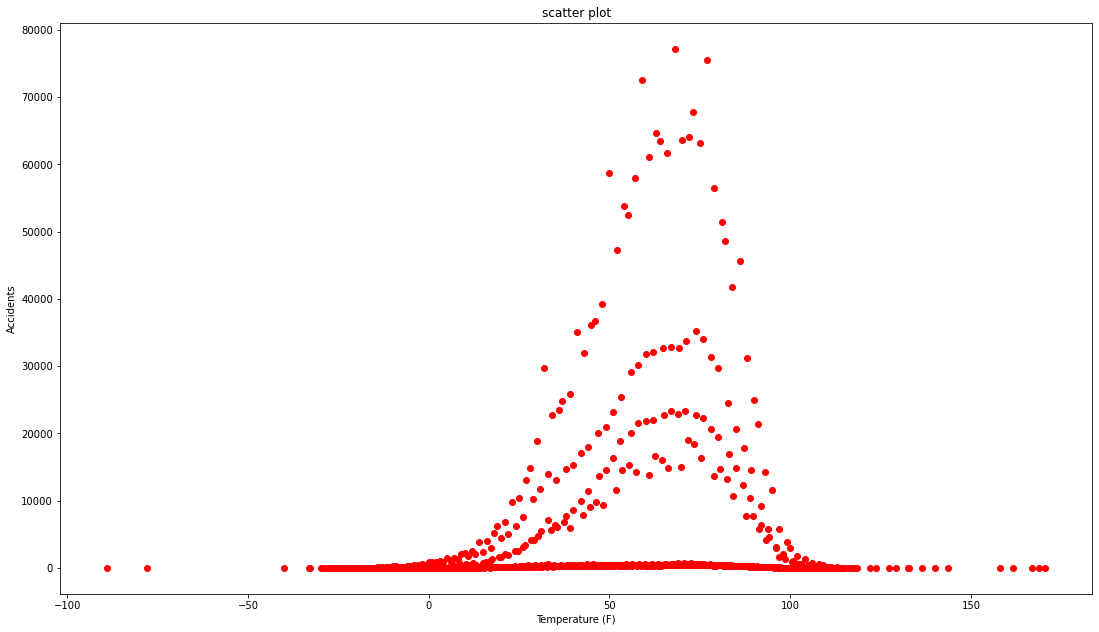

In [29]:
fig, ax = plt.subplots()
ax.scatter(accidents_vs_weather['Temperature(F)'], accidents_vs_weather['City'] , color='r')
ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Accidents')
ax.set_title('scatter plot')
fig.set_size_inches(18.5, 10.5)
plt.show()

In [37]:
rain = accident_df[accident_df['Precipitation(in)'] > 1]
accidents_vs_precipitation = rain.groupby("Precipitation(in)").count()['City'] 
accidents_vs_precipitation = accidents_vs_precipitation.reset_index()
accidents_vs_precipitation

,Precipitation(in),City
0,1.01,22
1,1.02,7
2,1.03,24
3,1.04,12
4,1.05,18
...,...,...
155,10.16,1
156,10.18,1
157,10.80,1
158,24.00,1


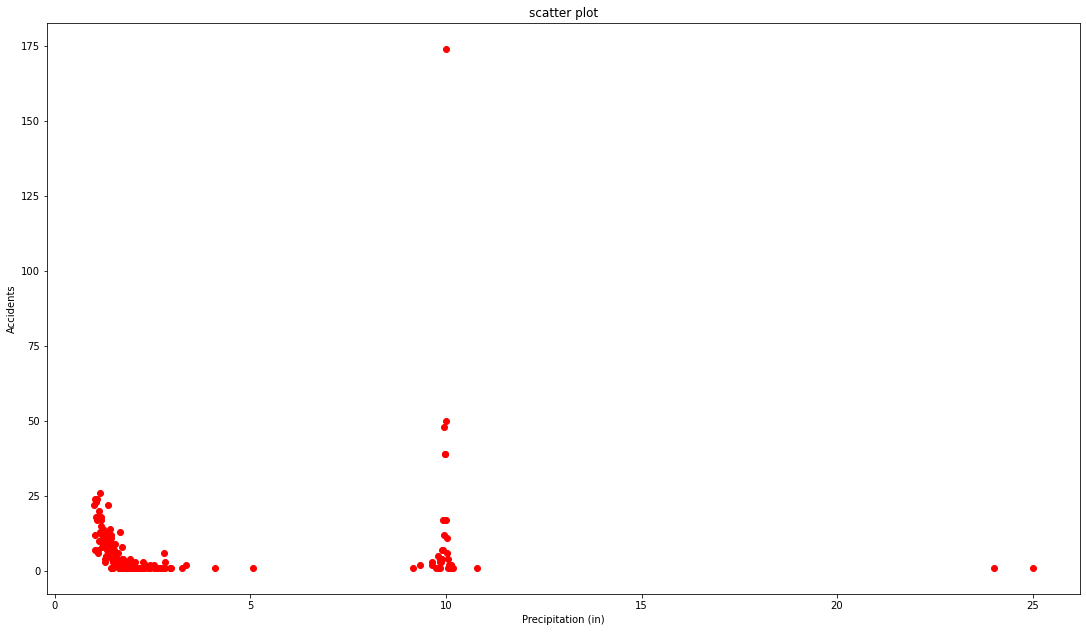

In [38]:
fig, ax = plt.subplots()
ax.scatter(accidents_vs_precipitation['Precipitation(in)'], accidents_vs_precipitation['City'] , color='r')
ax.set_xlabel('Precipitation (in)')
ax.set_ylabel('Accidents')
ax.set_title('scatter plot')
fig.set_size_inches(18.5, 10.5)
plt.show()

In [8]:
df = accident_df['Start_Time'].str.split(' ', 1)
date_series = df['date'] = df.str.get(0)
time_series = df['time'] = df.str.get(1)

time_series = list(time_series)
date_series = list(date_series)
del time_series[-1]

accident_df['Date'] = date_series
accident_df['Time'] = time_series
accident_df

,Start_Time,Start_Lat,Start_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Date,Time
0,2016-02-08 05:46:00,39.865147,-84.058723,Dayton,OH,2016-02-08 05:58:00,36.9,NaN,10.0,Calm,NaN,0.02,Light Rain,2016-02-08,05:46:00
1,2016-02-08 06:07:59,39.928059,-82.831184,Reynoldsburg,OH,2016-02-08 05:51:00,37.9,NaN,10.0,Calm,NaN,0.00,Light Rain,2016-02-08,06:07:59
2,2016-02-08 06:49:27,39.063148,-84.032608,Williamsburg,OH,2016-02-08 06:56:00,36.0,33.3,10.0,SW,3.5,NaN,Overcast,2016-02-08,06:49:27
3,2016-02-08 07:23:34,39.747753,-84.205582,Dayton,OH,2016-02-08 07:38:00,35.1,31.0,9.0,SW,4.6,NaN,Mostly Cloudy,2016-02-08,07:23:34
4,2016-02-08 07:39:07,39.627781,-84.188354,Dayton,OH,2016-02-08 07:53:00,36.0,33.3,6.0,SW,3.5,NaN,Mostly Cloudy,2016-02-08,07:39:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,CA,2019-08-23 17:53:00,86.0,86.0,10.0,W,13.0,0.00,Fair,2019-08-23,18:03:25
3513613,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,CA,2019-08-23 18:53:00,70.0,70.0,10.0,SW,6.0,0.00,Fair,2019-08-23,19:11:30
3513614,2019-08-23 19:00:21,33.775450,-117.847790,Orange,CA,2019-08-23 18:53:00,73.0,73.0,10.0,SSW,10.0,0.00,Partly Cloudy,2019-08-23,19:00:21
3513615,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,CA,2019-08-23 18:51:00,71.0,71.0,10.0,SW,8.0,0.00,Fair,2019-08-23,19:00:21


In [12]:
year_2019_2020 = accident_df['Date'] > '2018-12-31'
year_2019_2020.head()

0    False
1    False
2    False
3    False
4    False
Name: Date, dtype: bool

In [14]:
accident_df_19_20 = accident_df[year_2019_2020]
accident_df_19_20

,Start_Time,Start_Lat,Start_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Date,Time
512224,2020-05-24 01:37:16,42.932457,-78.766060,Buffalo,NY,2020-05-24 01:54:00,64.0,64.0,10.0,CALM,0.0,0.00,Cloudy,2020-05-24,01:37:16
512225,2020-05-24 04:19:35,43.005428,-78.948601,Grand Island,NY,2020-05-24 03:53:00,62.0,62.0,5.0,ESE,5.0,0.01,Light Rain,2020-05-24,04:19:35
512226,2020-05-24 16:00:22,42.744190,-78.842873,Hamburg,NY,2020-05-24 15:54:00,83.0,83.0,10.0,SW,9.0,0.00,Partly Cloudy,2020-05-24,16:00:22
512227,2020-05-24 09:21:07,42.013992,-70.726639,Duxbury,MA,2020-05-24 09:15:00,54.0,54.0,10.0,ENE,13.0,0.00,Mostly Cloudy,2020-05-24,09:21:07
512228,2020-05-24 15:13:34,42.380833,-71.076225,Charlestown,MA,2020-05-24 14:54:00,52.0,52.0,10.0,E,15.0,0.00,Cloudy,2020-05-24,15:13:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,CA,2019-08-23 17:53:00,86.0,86.0,10.0,W,13.0,0.00,Fair,2019-08-23,18:03:25
3513613,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,CA,2019-08-23 18:53:00,70.0,70.0,10.0,SW,6.0,0.00,Fair,2019-08-23,19:11:30
3513614,2019-08-23 19:00:21,33.775450,-117.847790,Orange,CA,2019-08-23 18:53:00,73.0,73.0,10.0,SSW,10.0,0.00,Partly Cloudy,2019-08-23,19:00:21
3513615,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,CA,2019-08-23 18:51:00,71.0,71.0,10.0,SW,8.0,0.00,Fair,2019-08-23,19:00:21


In [15]:
year_2019 = accident_df_19_20['Date'] < '2020-01-01'
year_2019

512224     False
512225     False
512226     False
512227     False
512228     False
           ...  
3513612     True
3513613     True
3513614     True
3513615     True
3513616     True
Name: Date, Length: 1492920, dtype: bool

In [16]:
final_accident_df_2019 = accident_df_19_20[year_2019]
final_accident_df_2019

,Start_Time,Start_Lat,Start_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Date,Time
641495,2019-12-26 17:09:52,40.884850,-95.800362,Thurman,IA,2019-12-26 17:15:00,31.0,31.0,10.0,CALM,0.0,0.0,Fair,2019-12-26,17:09:52
641496,2019-12-26 17:10:32,40.889641,-95.798630,Thurman,IA,2019-12-26 17:15:00,31.0,31.0,10.0,CALM,0.0,0.0,Fair,2019-12-26,17:10:32
740268,2019-12-31 23:49:36,42.313499,-83.091225,Detroit,MI,2019-12-31 23:53:00,28.0,17.0,7.0,WSW,13.0,0.0,Cloudy,2019-12-31,23:49:36
740270,2019-12-31 23:50:02,42.398125,-83.109009,Detroit,MI,2019-12-31 23:53:00,28.0,17.0,7.0,WSW,13.0,0.0,Cloudy,2019-12-31,23:50:02
740335,2019-12-31 23:29:03,39.754967,-75.276283,Swedesboro,NJ,2019-12-31 23:54:00,43.0,36.0,10.0,WNW,14.0,0.0,Mostly Cloudy,2019-12-31,23:29:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,CA,2019-08-23 17:53:00,86.0,86.0,10.0,W,13.0,0.0,Fair,2019-08-23,18:03:25
3513613,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,CA,2019-08-23 18:53:00,70.0,70.0,10.0,SW,6.0,0.0,Fair,2019-08-23,19:11:30
3513614,2019-08-23 19:00:21,33.775450,-117.847790,Orange,CA,2019-08-23 18:53:00,73.0,73.0,10.0,SSW,10.0,0.0,Partly Cloudy,2019-08-23,19:00:21
3513615,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,CA,2019-08-23 18:51:00,71.0,71.0,10.0,SW,8.0,0.0,Fair,2019-08-23,19:00:21


In [17]:
final_accident_df_2019['Date'].sort_values()

3192937    2019-01-01
3193479    2019-01-01
3193573    2019-01-01
3193572    2019-01-01
3193571    2019-01-01
              ...    
751933     2019-12-31
751934     2019-12-31
751935     2019-12-31
751937     2019-12-31
751821     2019-12-31
Name: Date, Length: 953733, dtype: object

In [50]:
final_accident_df_2019.columns

Index(['Start_Time', 'Start_Lat', 'Start_Lng', 'City', 'State',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Date', 'Time'],
      dtype='object')

In [51]:
new_order = ['Date','Time','Start_Time', 'Start_Lat', 'Start_Lng', 'City', 'State',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition']
final_accident_df_2019 = final_accident_df_2019.reindex(columns = new_order)

In [52]:
final_accident_df_2019

,Date,Time,Start_Time,Start_Lat,Start_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
641495,2019-12-26,17:09:52,2019-12-26 17:09:52,40.884850,-95.800362,Thurman,IA,2019-12-26 17:15:00,31.0,31.0,10.0,CALM,0.0,0.0,Fair
641496,2019-12-26,17:10:32,2019-12-26 17:10:32,40.889641,-95.798630,Thurman,IA,2019-12-26 17:15:00,31.0,31.0,10.0,CALM,0.0,0.0,Fair
740268,2019-12-31,23:49:36,2019-12-31 23:49:36,42.313499,-83.091225,Detroit,MI,2019-12-31 23:53:00,28.0,17.0,7.0,WSW,13.0,0.0,Cloudy
740270,2019-12-31,23:50:02,2019-12-31 23:50:02,42.398125,-83.109009,Detroit,MI,2019-12-31 23:53:00,28.0,17.0,7.0,WSW,13.0,0.0,Cloudy
740335,2019-12-31,23:29:03,2019-12-31 23:29:03,39.754967,-75.276283,Swedesboro,NJ,2019-12-31 23:54:00,43.0,36.0,10.0,WNW,14.0,0.0,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,2019-08-23,18:03:25,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,CA,2019-08-23 17:53:00,86.0,86.0,10.0,W,13.0,0.0,Fair
3513613,2019-08-23,19:11:30,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,CA,2019-08-23 18:53:00,70.0,70.0,10.0,SW,6.0,0.0,Fair
3513614,2019-08-23,19:00:21,2019-08-23 19:00:21,33.775450,-117.847790,Orange,CA,2019-08-23 18:53:00,73.0,73.0,10.0,SSW,10.0,0.0,Partly Cloudy
3513615,2019-08-23,19:00:21,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,CA,2019-08-23 18:51:00,71.0,71.0,10.0,SW,8.0,0.0,Fair


In [1]:
accident = final_accident_df_2019.groupby('Temperatur(F)').count()
accident.head()

NameError: name 'final_accident_df_2019' is not defined